In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip3 install mysql

In [3]:
!pip3 install mysql-connector-python

### Import all the given datasets from MYSQL server

In [4]:
import mysql.connector as mysql

In [5]:
con= mysql.connect(
    host='localhost',
    database='Telcom',
    user='root',
    password='password1234'  
    )

In [6]:
query1 =" Select * from telcomcustomerchurn_1"

In [7]:
query2 =" Select * from telcomcustomerchurn_2"

In [8]:
df1 = pd.read_sql(query1, con)

In [9]:
df2 = pd.read_sql(query2, con)

In [10]:
df1.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes


In [11]:
df1.shape

(7043, 10)

In [12]:
df1.size

70430

In [13]:
df2.head(3)

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [14]:
df2.shape

(7032, 12)

In [15]:
df2.size

84384

In [16]:
df=pd.merge(df1,df2,on="customerID") #Merge the datasets into one

In [17]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [18]:
df.shape #checking shape of the final data set

(7032, 21)

In [19]:
df.size #checking the size of the final dataset

147672

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [21]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [22]:
df.isnull().sum()/len(df)*100 # Checking the percentage of missing values in each column

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [23]:
len(df[df.duplicated()]) # Checking if there are any duplicate records

0

In [24]:
df.columns #columns present in the dataset

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

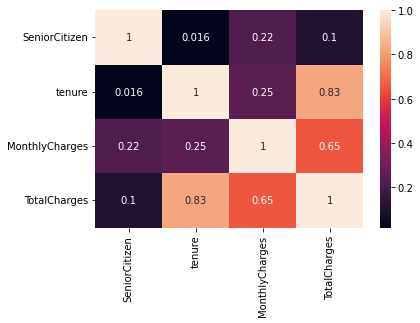

In [26]:
sns.heatmap(df.corr(),annot=True)

In [27]:
df.drop('customerID',axis=1,inplace=True) # Drop the columns which is redundant for analysis

In [28]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


###  Encode the categorical variables

In [29]:
gender=pd.get_dummies(df['gender'])

In [30]:
gender

,Female,Male
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
7027,0,1
7028,1,0
7029,1,0
7030,0,1


In [31]:
df.drop('gender',axis=1,inplace=True)

In [32]:
df=pd.concat([df,gender],axis=1)

In [33]:
Partner= pd.get_dummies(df['Partner'])
Partner=Partner.rename(columns={'No':'NoPartner','Yes':'YesPartner'})

In [34]:
df.drop('Partner',axis=1,inplace=True)

In [35]:
df=pd.concat([df,Partner],axis=1)

In [36]:
df.head(3)

,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female,Male,NoPartner,YesPartner
0,0,No,1,No,No phone service,DSL,No,Yes,No,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,0,1
1,0,No,34,Yes,No,DSL,Yes,No,Yes,No,...,One year,No,Mailed check,56.95,1889.50,No,0,1,1,0
2,0,No,2,Yes,No,DSL,Yes,Yes,No,No,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,1,1,0


In [37]:
Dependents= pd.get_dummies(df['Dependents'])
Dependents=Dependents.rename(columns={'No':'NoDependents','Yes':'YesDependents'})

In [38]:
Dependents

,NoDependents,YesDependents
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
7027,0,1
7028,0,1
7029,0,1
7030,1,0


In [39]:
df.drop('Dependents',axis=1,inplace=True)

In [40]:
df=pd.concat([df,Dependents],axis=1)

In [41]:
df.head(3)

,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female,Male,NoPartner,YesPartner,NoDependents,YesDependents
0,0,1,No,No phone service,DSL,No,Yes,No,No,No,...,Electronic check,29.85,29.85,No,1,0,0,1,1,0
1,0,34,Yes,No,DSL,Yes,No,Yes,No,No,...,Mailed check,56.95,1889.50,No,0,1,1,0,1,0
2,0,2,Yes,No,DSL,Yes,Yes,No,No,No,...,Mailed check,53.85,108.15,Yes,0,1,1,0,1,0


In [42]:
PhoneService= pd.get_dummies(df['PhoneService'])
PhoneService=PhoneService.rename(columns={'No':'NoPhoneService','Yes':'YesPhoneService'})

In [43]:
PhoneService

,NoPhoneService,YesPhoneService
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
7027,0,1
7028,0,1
7029,1,0
7030,0,1


In [44]:
df.drop('PhoneService',axis=1,inplace=True)

In [45]:
df=pd.concat([df,PhoneService],axis=1)

In [46]:
df.head(3)

,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,TotalCharges,Churn,Female,Male,NoPartner,YesPartner,NoDependents,YesDependents,NoPhoneService,YesPhoneService
0,0,1,No phone service,DSL,No,Yes,No,No,No,No,...,29.85,No,1,0,0,1,1,0,1,0
1,0,34,No,DSL,Yes,No,Yes,No,No,No,...,1889.50,No,0,1,1,0,1,0,0,1
2,0,2,No,DSL,Yes,Yes,No,No,No,No,...,108.15,Yes,0,1,1,0,1,0,0,1


In [47]:
MultipleLines= pd.get_dummies(df['MultipleLines'])
MultipleLines=MultipleLines.rename(columns={'No':'NoMultipleLines','Yes':'YesMultipleLines'})

In [48]:
MultipleLines

,NoMultipleLines,No phone service,YesMultipleLines
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
7027,0,0,1
7028,0,0,1
7029,0,1,0
7030,0,0,1


In [49]:
df.drop('MultipleLines',axis=1,inplace=True)

In [50]:
df=pd.concat([df,MultipleLines],axis=1)

In [51]:
df.head(3)

,SeniorCitizen,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,...,Male,NoPartner,YesPartner,NoDependents,YesDependents,NoPhoneService,YesPhoneService,NoMultipleLines,No phone service,YesMultipleLines
0,0,1,DSL,No,Yes,No,No,No,No,Month-to-month,...,0,0,1,1,0,1,0,0,1,0
1,0,34,DSL,Yes,No,Yes,No,No,No,One year,...,1,1,0,1,0,0,1,1,0,0
2,0,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,...,1,1,0,1,0,0,1,1,0,0


In [52]:
InternetService= pd.get_dummies(df['InternetService'])
InternetService=InternetService.rename(columns={'No':'NoInternetService'})

In [53]:
InternetService

,DSL,Fiber optic,NoInternetService
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
7027,1,0,0
7028,0,1,0
7029,1,0,0
7030,0,1,0


In [54]:
df.drop('InternetService',axis=1,inplace=True)

In [55]:
df=pd.concat([df,InternetService],axis=1)

In [56]:
OnlineSecurity= pd.get_dummies(df['OnlineSecurity'])
OnlineSecurity=OnlineSecurity.rename(columns={'No':'NoOnlineSecurity','Yes':'YesOnlineSecurity'})

In [57]:
OnlineSecurity

,NoOnlineSecurity,No internet service,YesOnlineSecurity
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
7027,0,0,1
7028,1,0,0
7029,0,0,1
7030,1,0,0


In [58]:
df.drop('OnlineSecurity',axis=1,inplace=True)

In [59]:
df=pd.concat([df,OnlineSecurity],axis=1)

In [60]:
df.head(3)

,SeniorCitizen,tenure,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,...,YesPhoneService,NoMultipleLines,No phone service,YesMultipleLines,DSL,Fiber optic,NoInternetService,NoOnlineSecurity,No internet service,YesOnlineSecurity
0,0,1,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,...,0,0,1,0,1,0,0,1,0,0
1,0,34,No,Yes,No,No,No,One year,No,Mailed check,...,1,1,0,0,1,0,0,0,0,1
2,0,2,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,...,1,1,0,0,1,0,0,0,0,1


In [61]:
df.columns

Index(['SeniorCitizen', 'tenure', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'Female', 'Male', 'NoPartner', 'YesPartner', 'NoDependents',
       'YesDependents', 'NoPhoneService', 'YesPhoneService', 'NoMultipleLines',
       'No phone service', 'YesMultipleLines', 'DSL', 'Fiber optic',
       'NoInternetService', 'NoOnlineSecurity', 'No internet service',
       'YesOnlineSecurity'],
      dtype='object')

In [62]:
OnlineBackup= pd.get_dummies(df['OnlineBackup'])
OnlineBackup=OnlineBackup.rename(columns={'No':'NoOnlineBackup','Yes':'YesOnlineBackup'})

In [63]:
OnlineBackup

,NoOnlineBackup,No internet service,YesOnlineBackup
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0
...,...,...,...
7027,1,0,0
7028,0,0,1
7029,1,0,0
7030,1,0,0


In [64]:
df.drop('OnlineBackup',axis=1,inplace=True)

In [65]:
df=pd.concat([df,OnlineBackup],axis=1)

In [66]:
df.head(3)

,SeniorCitizen,tenure,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,...,YesMultipleLines,DSL,Fiber optic,NoInternetService,NoOnlineSecurity,No internet service,YesOnlineSecurity,NoOnlineBackup,No internet service,YesOnlineBackup
0,0,1,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,...,0,1,0,0,1,0,0,0,0,1
1,0,34,Yes,No,No,No,One year,No,Mailed check,56.95,...,0,1,0,0,0,0,1,1,0,0
2,0,2,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,...,0,1,0,0,0,0,1,0,0,1


In [67]:
DeviceProtection= pd.get_dummies(df['DeviceProtection'])
DeviceProtection=DeviceProtection.rename(columns={'No':'NoDeviceProtection','Yes':'YesDeviceProtection'})

In [68]:
DeviceProtection

,NoDeviceProtection,No internet service,YesDeviceProtection
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
7027,0,0,1
7028,0,0,1
7029,1,0,0
7030,1,0,0


In [69]:
df.drop('DeviceProtection',axis=1,inplace=True)

In [70]:
df=pd.concat([df,DeviceProtection],axis=1)

In [71]:
TechSupport= pd.get_dummies(df['TechSupport'])
TechSupport=TechSupport.rename(columns={'No':'NoTechSupport','Yes':'YesTechSupport'})

In [72]:
df.drop('TechSupport',axis=1,inplace=True)

In [73]:
df=pd.concat([df,TechSupport],axis=1)

In [74]:
StreamingTV= pd.get_dummies(df['StreamingTV'])
StreamingTV=StreamingTV.rename(columns={'No':'NoStreamingTV','Yes':'YesStreamingTV'})

In [75]:
df.drop('StreamingTV',axis=1,inplace=True)

In [76]:
df=pd.concat([df,StreamingTV],axis=1)

In [77]:
StreamingMovies= pd.get_dummies(df['StreamingMovies'])
StreamingMovies=StreamingMovies.rename(columns={'No':'NoStreamingMovies','Yes':'YesStreamingMovies'})

In [78]:
df.drop('StreamingMovies',axis=1,inplace=True)

In [79]:
df=pd.concat([df,StreamingMovies],axis=1)

In [80]:
Contract= pd.get_dummies(df['Contract'])

In [81]:
df.drop('Contract',axis=1,inplace=True)

In [82]:
df=pd.concat([df,Contract],axis=1)

In [83]:
df.head(3)

,SeniorCitizen,tenure,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female,Male,NoPartner,...,YesTechSupport,NoStreamingTV,No internet service,YesStreamingTV,NoStreamingMovies,No internet service,YesStreamingMovies,Month-to-month,One year,Two year
0,0,1,Yes,Electronic check,29.85,29.85,No,1,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0,34,No,Mailed check,56.95,1889.50,No,0,1,1,...,0,1,0,0,1,0,0,0,1,0
2,0,2,Yes,Mailed check,53.85,108.15,Yes,0,1,1,...,0,1,0,0,1,0,0,1,0,0


In [84]:
PaymentMethod= pd.get_dummies(df['PaymentMethod'])

In [85]:
PaymentMethod

,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
7027,0,0,0,1
7028,0,1,0,0
7029,0,0,1,0
7030,0,0,0,1


In [86]:
df.drop('PaymentMethod',axis=1,inplace=True)

In [87]:
df=pd.concat([df,PaymentMethod],axis=1)

In [88]:
PaperlessBilling= pd.get_dummies(df['PaperlessBilling'])
PaperlessBilling=PaperlessBilling.rename(columns={'No':'NoPaperlessBilling','Yes':'YesPaperlessBilling'})

In [89]:
df.drop('PaperlessBilling',axis=1,inplace=True)

In [90]:
df=pd.concat([df,PaperlessBilling],axis=1)

In [91]:
Churn= pd.get_dummies(df['Churn'])
Churn=Churn.rename(columns={'No':'NoChurn','Yes':'YesChurn'})

In [92]:
df.drop('Churn',axis=1,inplace=True)

In [93]:
df=pd.concat([df,Churn],axis=1)

In [94]:
df.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Female,Male,NoPartner,YesPartner,NoDependents,YesDependents,...,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,NoPaperlessBilling,YesPaperlessBilling,NoChurn,YesChurn
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,0,0,0,1,0,0,1,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,1,0,0,0,0,1,1,0,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,0,0,0,0,1,0,1,0,1


In [95]:
df.shape

(7032, 47)

In [96]:
df.describe() #statistical summery of the dataset

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Female,Male,NoPartner,YesPartner,NoDependents,YesDependents,...,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,NoPaperlessBilling,YesPaperlessBilling,NoChurn,YesChurn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.495307,0.504693,0.517491,0.482509,0.701507,0.298493,...,0.209329,0.239619,0.219283,0.216297,0.336320,0.228100,0.407281,0.592719,0.734215,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.500014,0.500014,0.499729,0.499729,0.457629,0.457629,...,0.406858,0.426881,0.413790,0.411748,0.472483,0.419637,0.491363,0.491363,0.441782,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='Frequency'>

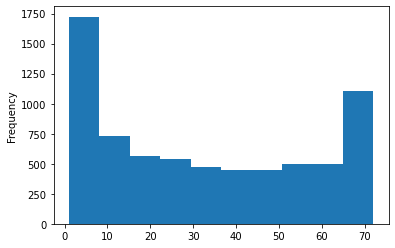

In [97]:
df['tenure'].plot(kind='hist')

Majority of customers are short termed customer.

<AxesSubplot:ylabel='Frequency'>

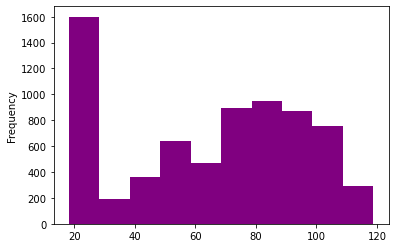

In [98]:
df['MonthlyCharges'].plot(kind='hist',color='purple')

<AxesSubplot:ylabel='Frequency'>

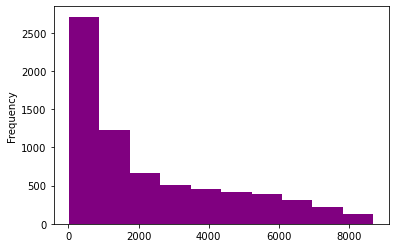

In [99]:
df['TotalCharges'].plot(kind='hist',color='purple')

maximum customers' total charges are low.

<AxesSubplot:ylabel='YesChurn'>

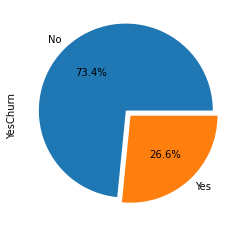

In [100]:
df["YesChurn"].value_counts().plot(kind="pie",labels=["No","Yes"],autopct='%1.1f%%',explode=[0.07,0.01])

<AxesSubplot:xlabel='Male', ylabel='count'>

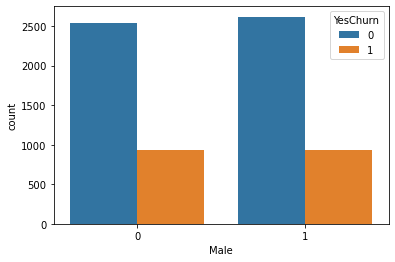

In [101]:
sns.countplot(data = df ,x='Male',hue='YesChurn')

Male customers at lvl 0 indicates female customers.From the plot it seems that both male and female customers who left within one month are almost same.

<AxesSubplot:xlabel='YesPartner', ylabel='count'>

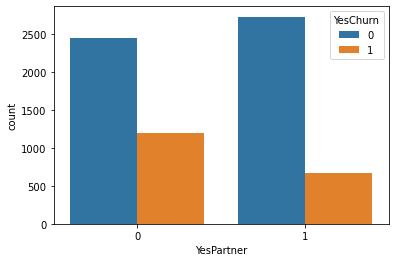

In [102]:
sns.countplot(data = df ,x='YesPartner',hue='YesChurn')

Customers with no partner have a high intention to leave within last month.

<AxesSubplot:xlabel='YesDependents', ylabel='count'>

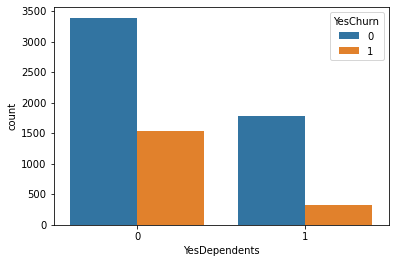

In [103]:
sns.countplot(data = df ,x='YesDependents',hue='YesChurn')

Customers with no dependents have a high intention to leave within last month.

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

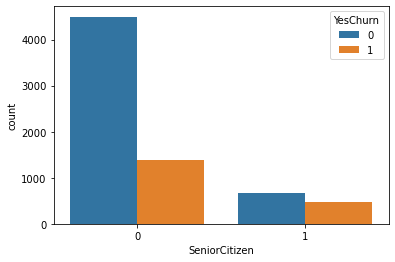

In [104]:
sns.countplot(data = df ,x='SeniorCitizen',hue='YesChurn')

Customars who are not senior citizen have left within last month the most.

<AxesSubplot:>

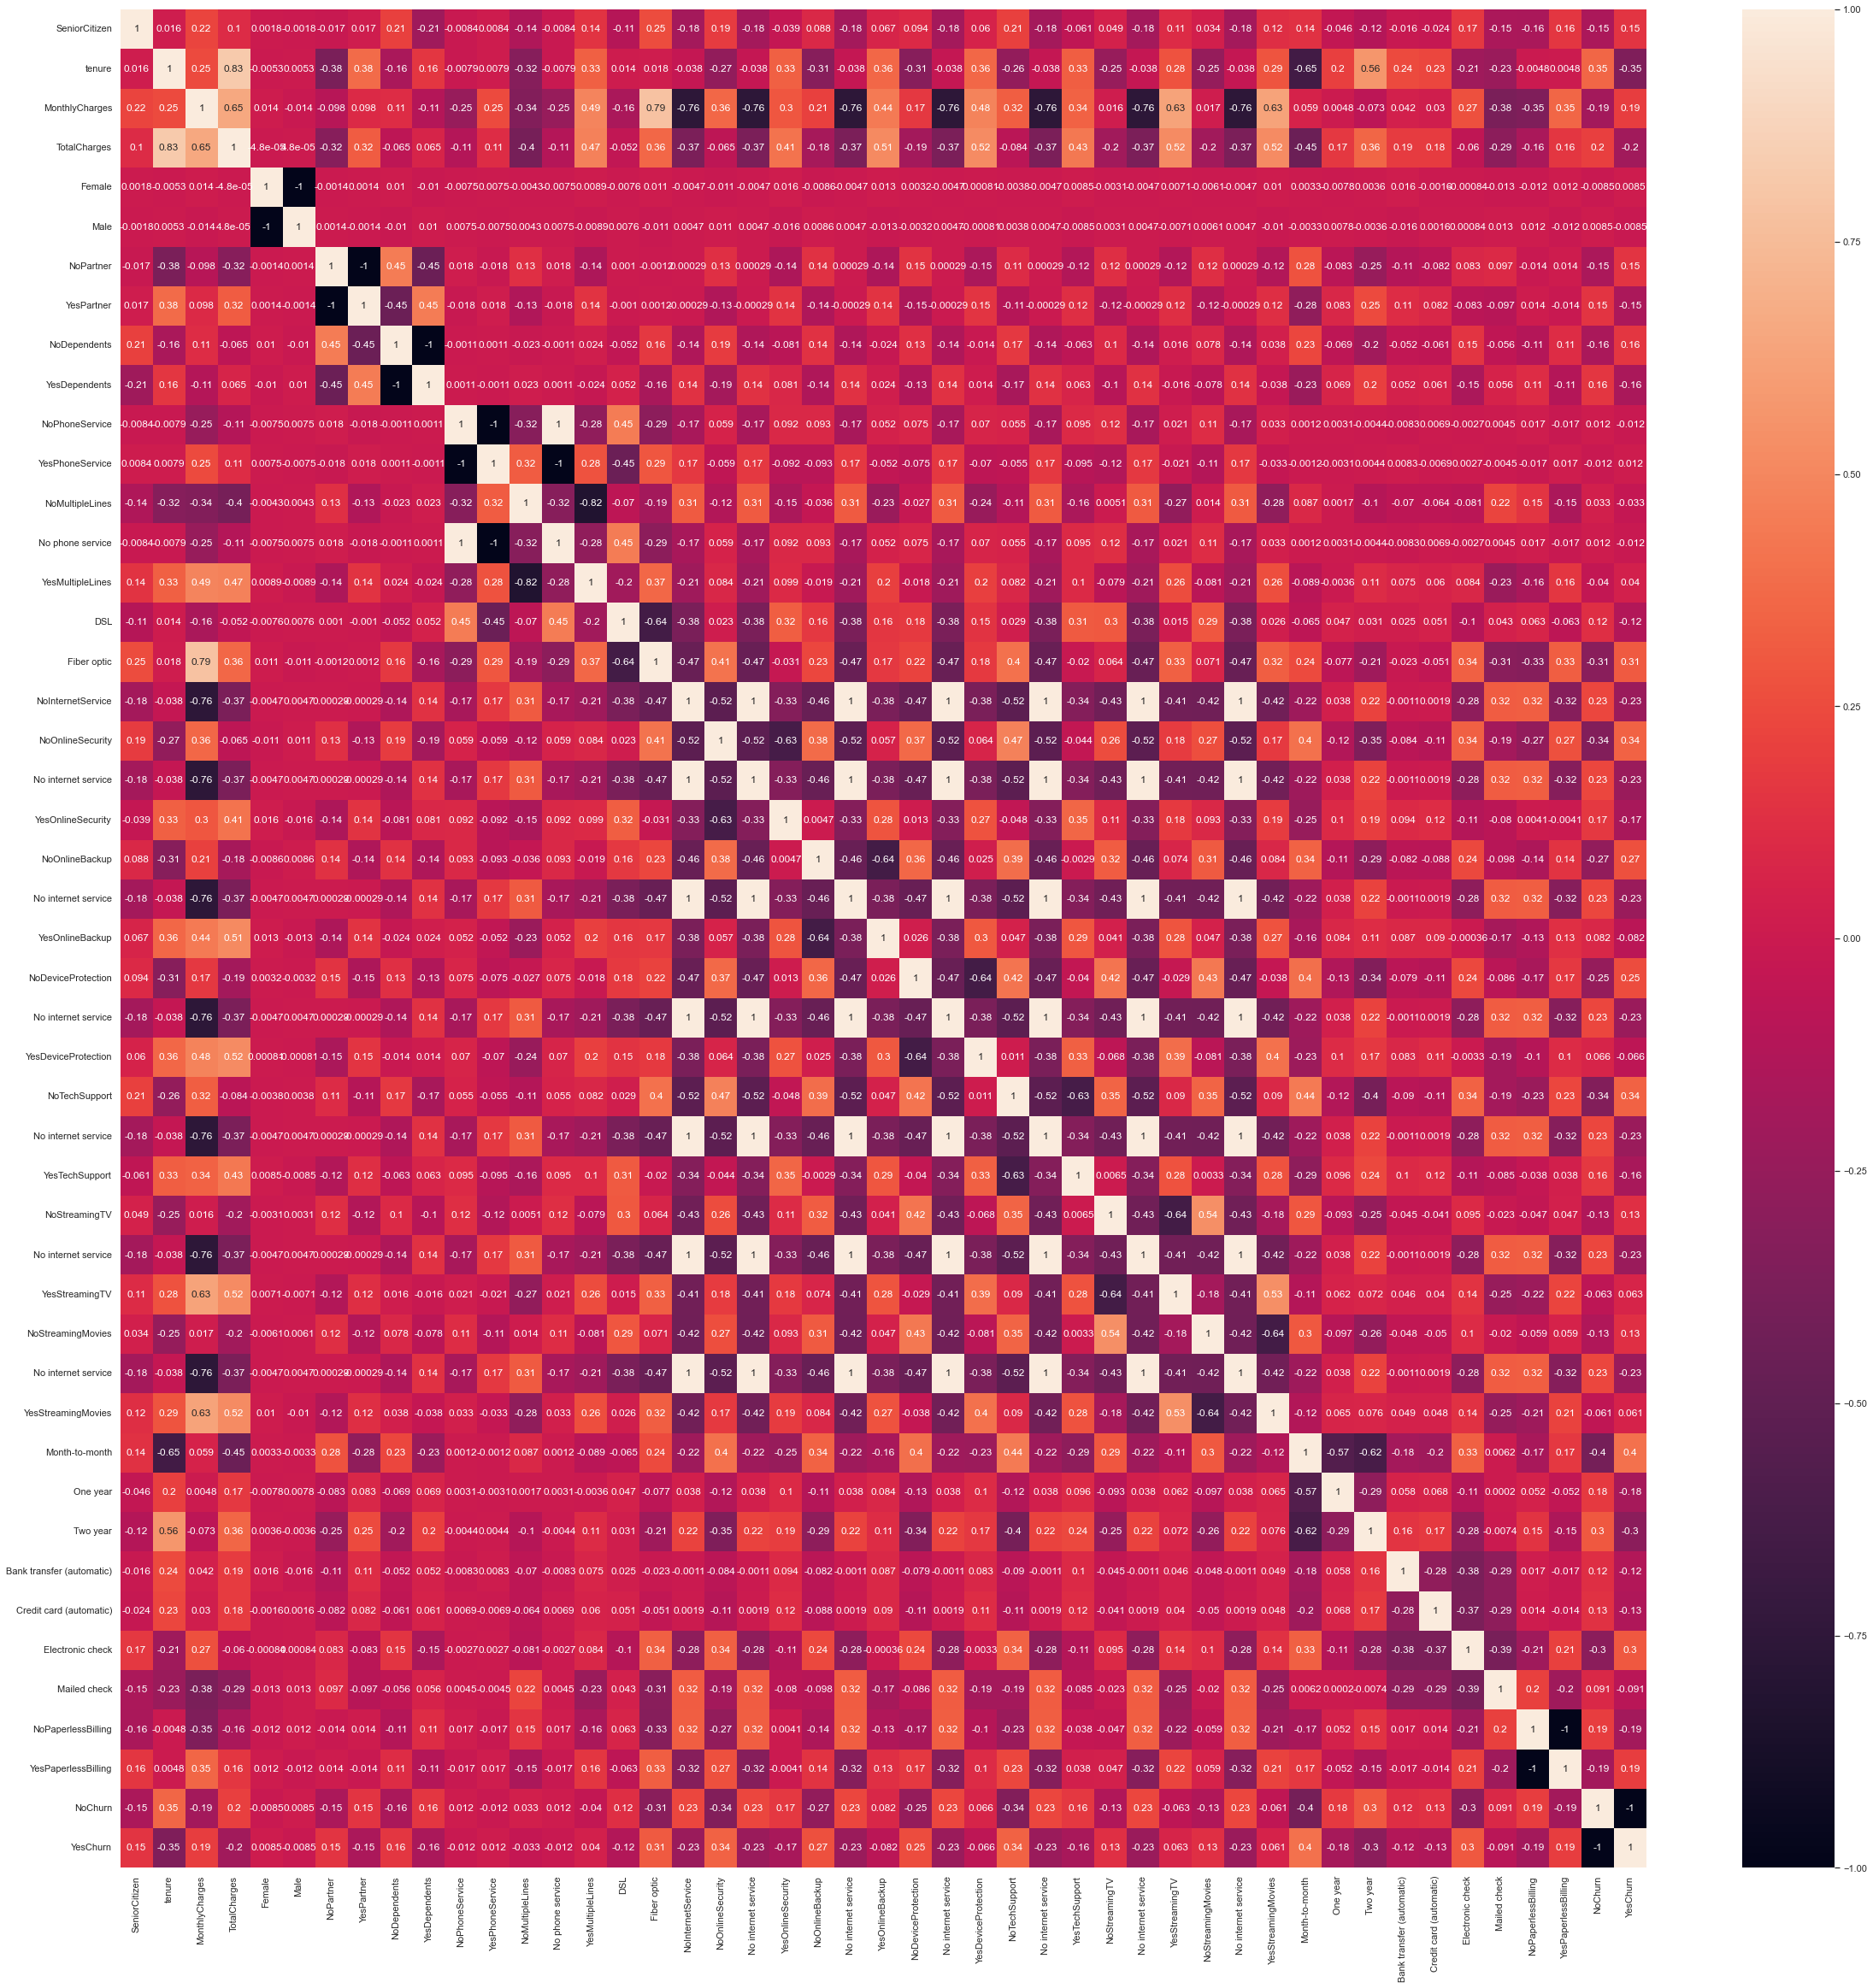

In [105]:
sns.set(rc={'figure.figsize':(40,40)})
sns.heatmap(df.corr(),annot=True)

In [106]:
sns.set(rc={'figure.figsize':(6,4)})

In [107]:
df=df.drop("NoChurn",axis=1)

###  Store the target column (i.e. Churn) in the y variable and the rest of the columns in the X variable. 

In [108]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [109]:
X.shape

(7032, 45)

In [110]:
Y.shape

(7032,)

###  Split the dataset into two parts (i.e. 70% train and 30% test). 

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

###  Standardize the columns using z-score scaling approach. 

In [113]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [114]:
X_train.iloc[:,1:4]=ss.fit_transform(X_train.iloc[:,1:4])
X_test.iloc[:,1:4]=ss.transform(X_test.iloc[:,1:4])

In [115]:
X_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Female,Male,NoPartner,YesPartner,NoDependents,YesDependents,...,YesStreamingMovies,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,NoPaperlessBilling,YesPaperlessBilling
1579,1,1.330585,-0.383857,0.534804,1,0,1,0,1,0,...,1,0,0,1,1,0,0,0,0,1
1040,0,-0.013956,0.155250,0.022199,0,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
1074,0,0.352737,1.639866,0.977112,1,0,1,0,1,0,...,1,1,0,0,1,0,0,0,0,1
2473,0,-1.154780,-0.680780,-0.909757,0,1,1,0,1,0,...,0,1,0,0,0,0,0,1,1,0
6897,0,-0.951061,-0.322482,-0.809427,0,1,1,0,0,1,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0,-0.543624,0.009276,-0.466770,0,1,1,0,1,0,...,1,0,1,0,1,0,0,0,0,1
5192,0,1.534304,1.374460,2.234331,1,0,0,1,0,1,...,1,0,1,0,0,0,1,0,0,1
3980,0,-0.869574,0.379186,-0.639347,1,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,1
235,0,-1.236267,-0.353999,-0.956483,0,1,1,0,1,0,...,0,1,0,0,0,0,0,1,0,1


In [116]:
X_test

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Female,Male,NoPartner,YesPartner,NoDependents,YesDependents,...,YesStreamingMovies,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,NoPaperlessBilling,YesPaperlessBilling
1773,0,1.615791,-1.337661,-0.191956,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
5028,1,-0.665855,0.672792,-0.403987,1,0,0,1,1,0,...,1,1,0,0,0,1,0,0,0,1
1102,0,1.249098,1.074219,1.733117,1,0,1,0,1,0,...,1,0,0,1,1,0,0,0,1,0
1660,0,-0.951061,0.390798,-0.715756,1,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,1
925,0,-0.788087,0.533454,-0.589247,1,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2048,0,0.597199,0.606441,0.774502,0,1,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
6208,0,1.208354,0.543407,1.176721,0,1,0,1,0,1,...,0,0,1,0,0,1,0,0,0,1
5213,0,-0.991805,0.014253,-0.755362,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
5859,0,-1.277011,-0.699027,-0.987196,1,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,1


###  Naive Bayes  

In [117]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB()

In [118]:
y_pred_gnb = gnb.predict(X_test)
y_pred_gnb[:10]

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1], dtype=uint8)

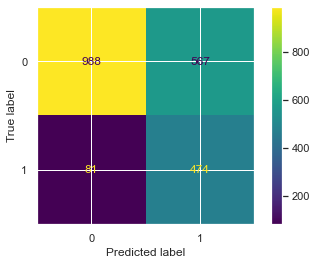

In [119]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gnb, X_test, Y_test)  
plt.show()

In [120]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_gnb))

              precision    recall  f1-score   support

           0       0.92      0.64      0.75      1555
           1       0.46      0.85      0.59       555

    accuracy                           0.69      2110
   macro avg       0.69      0.74      0.67      2110
weighted avg       0.80      0.69      0.71      2110



In [121]:
from sklearn.metrics import accuracy_score
print('accuracy of Naive Bayes:',accuracy_score(Y_test,y_pred_gnb))

accuracy of Naive Bayes: 0.6928909952606636


### KNN 

In [122]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [123]:
y_pred_knn = knn.predict(X_test)
y_pred_knn[:10]

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=uint8)

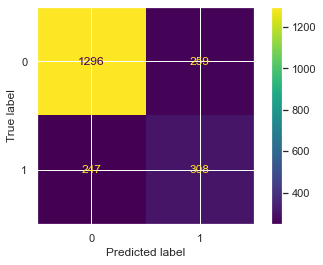

In [124]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, Y_test)  
plt.show()

In [125]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1555
           1       0.54      0.55      0.55       555

    accuracy                           0.76      2110
   macro avg       0.69      0.69      0.69      2110
weighted avg       0.76      0.76      0.76      2110



In [126]:
from sklearn.metrics import accuracy_score
print('accuracy of KNN:',accuracy_score(Y_test,y_pred_knn))

accuracy of KNN: 0.7601895734597156


In [127]:
error_rate=[]

for i in range(1,30):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

In [151]:
error_rate

[0.28720379146919434,
 0.25308056872037915,
 0.25118483412322273,
 0.23744075829383887,
 0.23981042654028437,
 0.23459715639810427,
 0.23554502369668245,
 0.22606635071090048,
 0.22464454976303316,
 0.22227488151658767,
 0.22748815165876776,
 0.22227488151658767,
 0.2184834123222749,
 0.21516587677725119,
 0.21753554502369668,
 0.21374407582938387,
 0.2156398104265403,
 0.209478672985782,
 0.20900473933649288,
 0.2080568720379147,
 0.2099526066350711,
 0.21184834123222748,
 0.2099526066350711,
 0.2052132701421801,
 0.2075829383886256,
 0.204739336492891,
 0.2071090047393365,
 0.2052132701421801,
 0.2075829383886256]

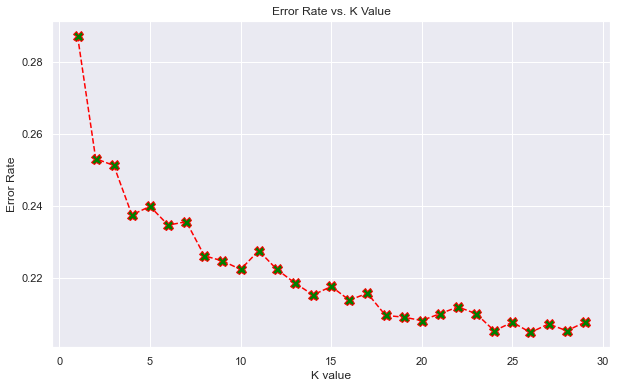

In [128]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='red', linestyle='dashed', marker='X',markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K value')
plt.ylabel('Error Rate')
plt.show()

In [144]:
knn_two = KNeighborsClassifier(n_neighbors=26)
knn_two.fit(X_train,Y_train)

y_pred_knn_two = knn_two.predict(X_test)

print('accuracy (k=26):',accuracy_score(Y_test,y_pred_knn_two))

accuracy (k=26): 0.795260663507109


In [145]:
print(classification_report(Y_test,y_pred_knn_two))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1555
           1       0.62      0.56      0.59       555

    accuracy                           0.80      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110



###  Logistic regression 

In [146]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [147]:
y_pred_lr=lr.predict(X_test)
y_pred_lr[:10]

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0], dtype=uint8)

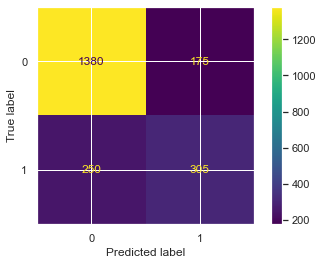

In [148]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, X_test, Y_test)  
plt.show()

In [149]:
print(classification_report(Y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1555
           1       0.64      0.55      0.59       555

    accuracy                           0.80      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110



In [150]:
print('accuracy of Logistic Regression:',accuracy_score(Y_test,y_pred_lr))

accuracy of Logistic Regression: 0.7985781990521327


### Conclusion 

Compairing the accuracy of the above three methods it is clearly visible that logistic regression method is the most accurate. KNN with optimal k value is also accurate but logistic regression is slightly better. 